<a href="https://colab.research.google.com/github/Nyakatodianah/Prediction-of-Product-Sales/blob/main/Copy_of_NYAKATO_DIANAH_Project1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content.drive')


Drive already mounted at /content.drive; to attempt to forcibly remount, call drive.mount("/content.drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading Data
filename="sales_predictions_2023.csv"
filepath="/content.drive/MyDrive/COURSE 1-WEEK2/sales_predictions_2023.csv"
df=pd.read_csv(filepath)
print(df)


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Data Cleaning
number_of_rows_and_columns=df.shape
print(number_of_rows_and_columns)


(8523, 12)


In [8]:
DataFrame_datatypes=df.dtypes
print(DataFrame_datatypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [9]:
clean_data=df.drop_duplicates()
print(clean_data)



     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [10]:
check_for_missing_values=df.isnull().values.any()
print(check_for_missing_values)

True


In [11]:
missing_values=df.isnull()
print(missing_values)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False        False             False            False   
...               ...          ...               ...              ...   
8518            False        False             False            False   
8519            False        False             False            False   
8520            False        False             False            False   
8521            False        False             False            False   
8522            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False    

In [12]:
filling_missing_values=df.fillna(method='pad')
print(filling_missing_values)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [13]:
to_confirm_if_there_are_no_missing_values=filling_missing_values.isnull().values.any()
print(to_confirm_if_there_are_no_missing_values)

False


In [14]:
dataframe_min=filling_missing_values.min()
print(dataframe_min)


Item_Identifier                      DRA12
Item_Weight                          4.555
Item_Fat_Content                        LF
Item_Visibility                        0.0
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Size                           High
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object


In [ ]:
dataframe_max=filling_missing_values.max()
print(dataframe_max)

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                           reg
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                              Small
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
dtype: object


In [15]:
dataframe_mean=filling_missing_values.mean()
print(dataframe_mean)

Item_Weight                    12.849649
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64


<ipython-input-15-22140244e946>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe_mean=filling_missing_values.mean()


In [16]:
columns = df.columns
print(columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [17]:
#remove placeholders
for column in df.columns:
    df[column] = df[column].replace('placeholders', None)
    print(df[column])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object
0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64
0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object
0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64
0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegeta

# Item Identifier  
### Product ID

# Item_Weight
### Weight of product

# Item_Fat_Content
Whether the product is low-fat or regular

# Item_Type
### The category to which the product belongs

# Item_Visibility
### The percentage of total display area of all products in a store allocated to the particular product


# Item_MRP
### Maximum Retail Price (list price) of the product





# Item_Outlet_Sales
### Sales of the product in the particular store. This is the target variable to be predicted.

# Outlet_Establishment_Year
### The year in which store was established


# Outlet_Size
### The size of the store in terms of ground area covered


# Outlet_Establishment_Year
### The year in which store was established

#Outlet_Identifier
### Store ID


# Outlet_Location_Type
### The type of area in which the store is located

# Outlet_Type
### Whether the outlet is a grocery store or some sort of supermarket

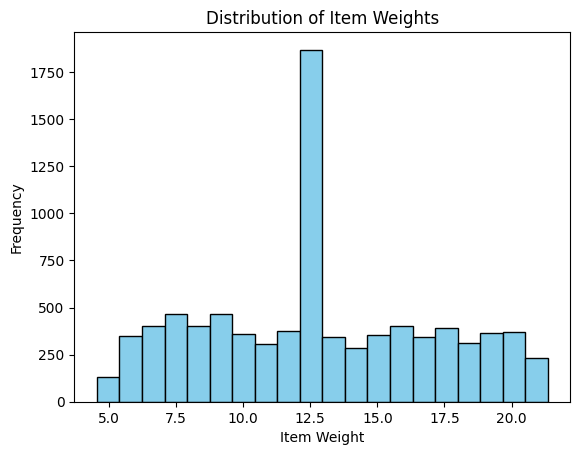

In [67]:
plt.hist(df['Item_Weight'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Item Weights')
plt.show()

In [68]:
#What type of feature is it? (Categorical (nominal), ordinal, numeric)



Item weight is numeric feature representing the weight of items.


In [69]:
# Calculate the number of null values
number_of_null_values = df['Item_Weight'].isnull().sum()

# Calculate the percentage of null values
percentage_of_null_values = (number_of_null_values / len(df)) * 100

print("Number of null values:", number_of_null_values)
print("Percentage of null values:", percentage_of_null_values)

Number of null values: 0
Percentage of null values: 0.0


In [47]:
#imputing for Item_Weight by calculating mean
mean_of_Item_Weight=df['Item_Weight'].mean()
print(mean_of_Item_Weight)


12.857645184135976


In [56]:
# Convert the "Item_Weight" column to numeric
df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors='coerce')
print(df['Item_Weight'])

# Calculate the mean of non-null values in the "Item_Weight" column
mean_item_weight = df['Item_Weight'].mean()
print(mean_item_weight)


0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64
12.857645184135976


In [59]:
# Impute null values in the "Item_Weight" column with the mean
imputing_null_values_with_mean=df['Item_Weight'].fillna(mean_item_weight, inplace=True)
print(imputing_null_values_with_mean)


None


In [60]:
# Check the number of null values after replacing
number_of_null_values_after = df['Item_Weight'].isnull().sum()
print("Number of null values after imputation:", number_of_null_values_after)

Number of null values after imputation: 0


In [62]:
#checking whether the variance value is constant or quasi constant.
variance_item_weight = df['Item_Weight'].var()
print("Variance of Item_Weight feature:", variance_item_weight)


Variance of Item_Weight feature: 17.86012173506058


The variance value is greater than zero and so it indicates that there is a noticeable amount of variability among the item weights.
And therefore it is neither constant because it's variance values are not zero and neither is it quasi constant because the variance values are not close to zero.

In [63]:
#checking for the cardinality
cardinality_for_Item_Weight=df['Item_Weight'].nunique()
print("cardinality for Item_Weight", cardinality_for_Item_Weight)

cardinality for Item_Weight 416


Well,Item_Weight has a high cardinality because its nunique values are higher than 10.

##Would we know this feature before the target is determined?


Yes we would know this feature before determining the target because the values were recorded.


### Is there a business case/understanding reason to exclude based on our business case?

Based on the business case,Item Weight should not be excluded because of its relevance to the analysis and its correlation with other features.
Forexample from the dataset,we see that Item Weight determines Item Fat Content so its relevant and so it should not be excluded.

In [73]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

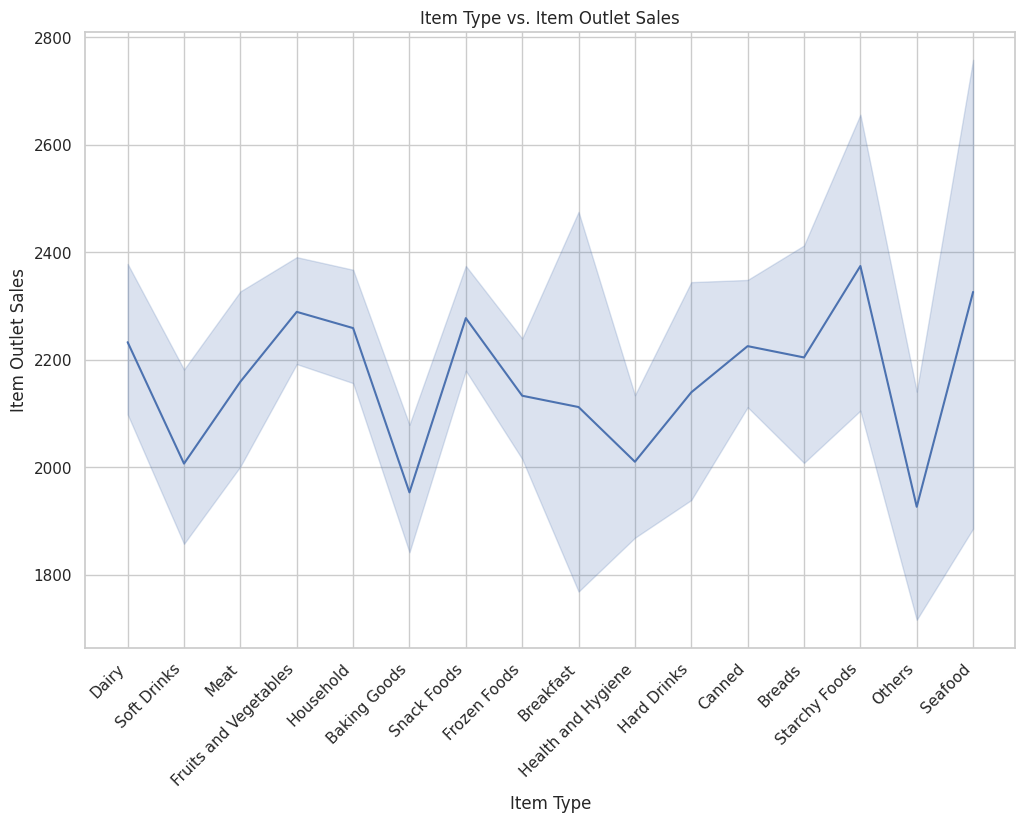

In [78]:
# Create a line plot of Item_Type vs. Item_Outlet_Sales
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
plt.title('Item Type vs. Item Outlet Sales')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



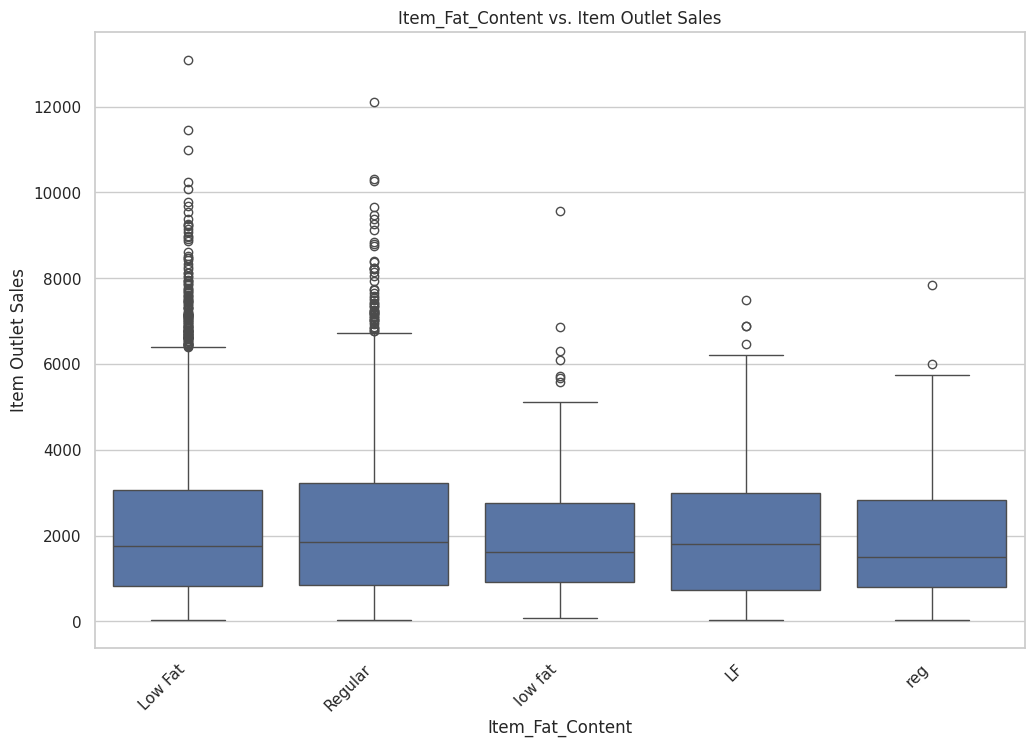

In [81]:
#create a box plot of Outlet size vs Item_Outlet_Sales
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Item_Fat_Content vs. Item Outlet Sales')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### Based on your business understanding, would you expect this feature to be a predictor of the target?
### Does this feature appear to be a predictor of the target?

certain Item types forexample Starchy foods are popular and have a higher demand, leading to higher sales figures.

Based on the line plot in the visualisation above,Item type has a positive correlation with Item Outlet Sales.
There is a significant variability in Item Outlet sales across different item types, which suggests that Item_Type may be a meaningful predictor of sales.






